# **Analysis of the Intrusion Detection Evaluation Dataset (CIC-IDS2017)**

[Dataset Link](https://www.unb.ca/cic/datasets/ids-2017.html)

## 1. An overview of the Dataset including the Dataset Characteristics and Exploratory Data Analysis, Data Preprocessing, and performance of different models.

- **Dataset Characteristics:** CIC-IDS2017 dataset contains network traffic data for the development and evaluation of intrusion detection systems. The dataset is designed to be representative of modern network traffic and includes more than 2.8 million network packets captured over a period of seven days in a real network environment. The dataset includes normal traffic and seven different attack scenarios: Brute Force, Heartbleed, Botnet, DoS, DDoS, Web Attack and Infiltration. The dataset is highly imbalanced. The majority of records belongs to the 'Benign' class and relatively few records belongs to the other classes. The dataset consists of 2830743 rows and 79 columns. In these columns, 78 of them are features that are numerical and the 'label' column is categorical.

- **Exploratory Data Analysis:** This dataset have many duplicate values (308381), which creates bias that is not good for the machine learning model. The number of missing values and infinite values on two columns 'Flow Bytes/s' and 'Flow Packets/s' are very few comparing to the size of the dataset which is only 0.06% (1564). However, the values were handled using appropriate methods.

- **Data Preprocessing:** We dropped the duplicates, replaced any infinite values (positive or negative) with NaN (not a number) and filled the missing values with median values. Since we have a very large dataset, the initial memory usage is quite high leading to session crashes. We later worked our way through this by down casting data types based on the min and max values available. We try to reduce the memory usages that is helpful for our model.

- **Data Analysis:** We grouped similar attacks together to analyze the dataset and identify patterns in the different types of attacks. We took a sample from the population (20%). Later we did some data analysis which consist of plotting various kinds of charts, correlation matrices etc. to see the relationships between features, types of attacks present in the dataset etc. In our analysis, we noticed there are a good number of features that are strongly, even directly correlated with other features (both positive and negative). This is an issue it introduces multi-collinearity which can highly impact the machine learning models that we will develop later.

  Also, as the dataset is quite huge and has more than 70 features, it would be extremely difficult to train models using limited resources. In order to overcome this issue, we used PCA (Principal Component Analysis) to reduece dimensions. We played with the number of components to see how much information we can preserve. We monitored the '*explained_variance_ratio_*' to make sure we retain most informations. However, it was a bit challenging to reduce dimensions while preserving the information to train the models. We performed StandardScaler before performing Incremental PCA.

- **ML Models:** It is worth mentioning the fact that the following dataset is highly imbalanced. So, we created a balanced dataset out of this with our domain knowledge to train various ML models. Since our dataset is quite large and has a reasonable amount of samples to train and test different ML models using various classification algorithms (Logistic Regression, Support Vector Machine for Binary Classification and Random Forest Classifier, Decision Tree, K Nearest Neighbours for Multi-class Classification).

  For binary classifications, we trained the models to distinguish between normal traffic and anomalous traffic. This means it will only predict whether an intrusion is taking place or not. Alternatively, using the multi-class classification algorithms, we further extended our prediction capabilities to identify which type of attack or intrusion is taking place. We tried both binary classifications and multi-class classifications to see how the data holds up. Later we cross-validated, evaluated and compared those models to see which one works better or worse.

- **Performance Evaluation:** After training multiple machine learning models, we proceeded to evaluate their respective performances. Our evaluation process involved comparing the accuracy, recall, f1-score and confusion matrix of each model. Through analysis of the results, we were able to see which model performed the best and which performed worse.

## 2.	Dataset Characteristics and Exploratory Data Analysis

### 2.1 Load, View Data and Show Analysis on Rows and Columns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
sns.set(style='darkgrid')
import matplotlib.pyplot as plt

In [ ]:
folderpath = '/content/drive/MyDrive/CICIDS2017' #
data1 = pd.read_csv(folderpath + '/Monday-WorkingHours.pcap_ISCX.csv')
data2 = pd.read_csv(folderpath + '/Tuesday-WorkingHours.pcap_ISCX.csv')
data3 = pd.read_csv(folderpath + '/Wednesday-workingHours.pcap_ISCX.csv')
data4 = pd.read_csv(folderpath + '/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
data5 = pd.read_csv(folderpath + '/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
data6 = pd.read_csv(folderpath + '/Friday-WorkingHours-Morning.pcap_ISCX.csv')
data7 = pd.read_csv(folderpath + '/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
data8 = pd.read_csv(folderpath + '/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')

#### comparison bw dataset-1 and dataset-2

In [ ]:
data1.head(2)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
data2.head(2)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,88,640,7,4,440,358,220,0,62.857143,107.349008,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,88,900,9,4,600,2944,300,0,66.666667,132.287566,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
cols1 = data1.columns
cols2 = data2.columns
similar_cols = list(set(cols1).intersection(cols2))
len(similar_cols)


79

#### compairsons bw whole datasets


In [ ]:
data_list = [data1, data2, data3, data4, data5, data6, data7, data8]

print('Data dimensions: ')
for i, data in enumerate(data_list, start = 1):
  rows, cols = data.shape
  print(f'Data{i} -> {rows} rows, {cols} columns')

Data dimensions: 
Data1 -> 529918 rows, 79 columns
Data2 -> 445909 rows, 79 columns
Data3 -> 692703 rows, 79 columns
Data4 -> 170366 rows, 79 columns
Data5 -> 288602 rows, 79 columns
Data6 -> 191033 rows, 79 columns
Data7 -> 286467 rows, 79 columns
Data8 -> 225745 rows, 79 columns


In [ ]:
data = pd.concat(data_list)
rows, cols = data.shape

print('New dimension:')
print(f'Number of rows: {rows}')
print(f'Number of columns: {cols}')
print(f'Total cells: {rows * cols}')

New dimension:
Number of rows: 2830743
Number of columns: 79
Total cells: 223628697


In [ ]:
# Deleting dataframes after concating to save memory
for d in data_list: del d

In [ ]:
# Renaming the columns by removing leading/trailing whitespace
col_names = {col: col.strip() for col in data.columns}
data.rename(columns = col_names, inplace = True)

In [ ]:
data.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2830743 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  Flow I

In [ ]:
pd.options.display.max_rows = 80

print('Overview of Columns:')
data.describe().transpose()

Overview of Columns:


,count,mean,std,min,25%,50%,75%,max
Destination Port,2830743.0,8.071483e+03,1.828363e+04,0.000000e+00,53.000000,80.000000,4.430000e+02,6.553500e+04
Flow Duration,2830743.0,1.478566e+07,3.365374e+07,-1.300000e+01,155.000000,31316.000000,3.204828e+06,1.200000e+08
Total Fwd Packets,2830743.0,9.361160e+00,7.496728e+02,1.000000e+00,2.000000,2.000000,5.000000e+00,2.197590e+05
Total Backward Packets,2830743.0,1.039377e+01,9.973883e+02,0.000000e+00,1.000000,2.000000,4.000000e+00,2.919220e+05
Total Length of Fwd Packets,2830743.0,5.493024e+02,9.993589e+03,0.000000e+00,12.000000,62.000000,1.870000e+02,1.290000e+07
Total Length of Bwd Packets,2830743.0,1.616264e+04,2.263088e+06,0.000000e+00,0.000000,123.000000,4.820000e+02,6.554530e+08
Fwd Packet Length Max,2830743.0,2.075999e+02,7.171848e+02,0.000000e+00,6.000000,37.000000,8.100000e+01,2.482000e+04
Fwd Packet Length Min,2830743.0,1.871366e+01,6.033935e+01,0.000000e+00,0.000000,2.000000,3.600000e+01,2.325000e+03
Fwd Packet Length Mean,2830743.0,5.820194e+01,1.860912e+02,0.000000e+00,6.000000,34.000000,5.000000e+01,5.940857e+03
Fwd Packet Length Std,2830743.0,6.891013e+01,2.811871e+02,0.000000e+00,0.000000,0.000000,2.616295e+01,7.125597e+03


In [ ]:
pd.options.display.max_columns = 80
data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,3.000000e+06,5.000000e+05,4.0,0.0,4,4,4,4.0,0.0,4,4,0,0.0,0.0,0,0,0,0,0,0,40,0,5.000000e+05,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,1.200000e+07,2.000000e+06,1.0,0.0,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,0,0,40,0,2.000000e+06,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,1.200000e+07,2.000000e+06,1.0,0.0,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,0,0,40,0,2.000000e+06,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,1.200000e+07,2.000000e+06,1.0,0.0,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,0,0,40,0,2.000000e+06,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,6.666667e+05,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,6.666667e+05,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,245,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,61374,61,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.967213e+05,3.278689e+04,61.0,0.0,61,61,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,1.639344e+04,16393.44262,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,288,253,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225741,61378,72,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.666667e+05,2.777778e+04,72.0,0.0,72,72,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,1.388889e+04,13888.88889,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,288,253,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225742,61375,75,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.600000e+05,2.666667e+04,75.0,0.0,75,75,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,1.333333e+04,13333.33333,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,288,253,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225743,61323,48,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,2.500000e+05,4.166667e+04,48.0,0.0,48,48,48,48.0,0.0,48,48,0,0.0,0.0,0,0,0,0,0,0,40,0,4.166667e+04,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,4719,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


### 2.2 Data Cleaning









#### Identifying duplicate values


In [ ]:
dups = data[data.duplicated()]
print(f'Number of duplicates: {len(dups)}')

Number of duplicates: 308381


In [ ]:
data.drop_duplicates(inplace = True)
data.shape

(2522362, 79)

#### Identifying missing values


In [ ]:
missing_val = data.isna().sum()
print(missing_val.loc[missing_val > 0])

Flow Bytes/s    353
dtype: int64


In [ ]:
# Checking for infinity values
numeric_cols = data.select_dtypes(include = np.number).columns
inf_count = np.isinf(data[numeric_cols]).sum()
print(inf_count[inf_count > 0])

Flow Bytes/s      1211
Flow Packets/s    1564
dtype: int64


In [ ]:
# Replacing any infinite values (positive or negative) with NaN (not a number)
print(f'Initial missing values: {data.isna().sum().sum()}')

data.replace([np.inf, -np.inf], np.nan, inplace = True)

print(f'Missing values after processing infinite values: {data.isna().sum().sum()}')

Initial missing values: 1358
Missing values after processing infinite values: 5734


In [ ]:
missing = data.isna().sum()
print(missing.loc[missing > 0])

Flow Bytes/s      1564
Flow Packets/s    1564
dtype: int64


In [ ]:
# Calculating missing value percentage in the dataset
mis_per = (missing / len(data)) * 100
mis_table = pd.concat([missing, mis_per.round(2)], axis = 1)
mis_table = mis_table.rename(columns = {0 : 'Missing Values', 1 : 'Percentage of Total Values'})

print(mis_table.loc[mis_per > 0])

                Missing Values  Percentage of Total Values
Flow Bytes/s              1564                        0.06
Flow Packets/s            1564                        0.06


#### Visualisation of missing data


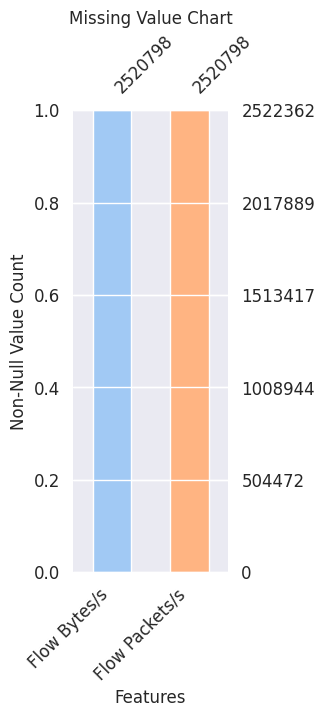

In [ ]:
sns.set_palette('pastel')
colors = sns.color_palette()

missing_vals = [col for col in data.columns if data[col].isna().any()]

fig, ax = plt.subplots(figsize = (2, 6))
msno.bar(data[missing_vals], ax = ax, fontsize = 12, color = colors)
ax.set_xlabel('Features', fontsize = 12)
ax.set_ylabel('Non-Null Value Count', fontsize = 12)
ax.set_title('Missing Value Chart', fontsize = 12)
plt.show()

#### Dealing with missing values (Columns with missing data)

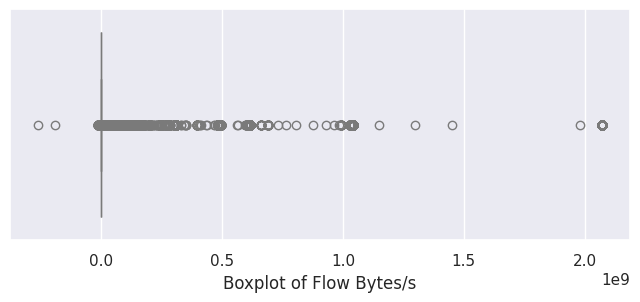

In [ ]:
data = data.reset_index(drop=True)

# Creating the boxplot
plt.figure(figsize=(8, 3))
sns.boxplot(x=data['Flow Bytes/s'])
plt.xlabel('Boxplot of Flow Bytes/s')
plt.show()

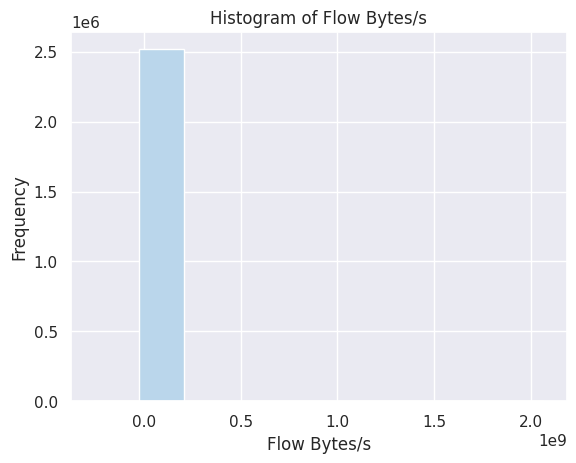

In [ ]:
colors = sns.color_palette('Blues')
plt.hist(data['Flow Bytes/s'], color = colors[1])
plt.title('Histogram of Flow Bytes/s')
plt.xlabel('Flow Bytes/s')
plt.ylabel('Frequency')
plt.show()

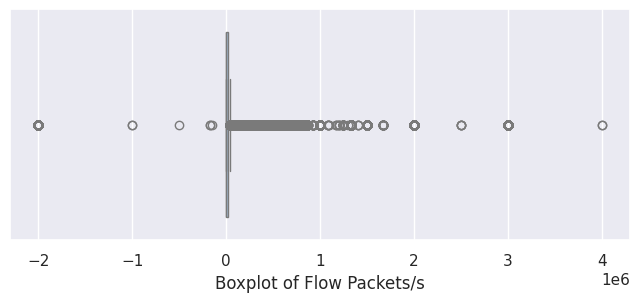

In [ ]:
plt.figure(figsize = (8, 3))
sns.boxplot(x = data['Flow Packets/s'])
plt.xlabel('Boxplot of Flow Packets/s')
plt.show()

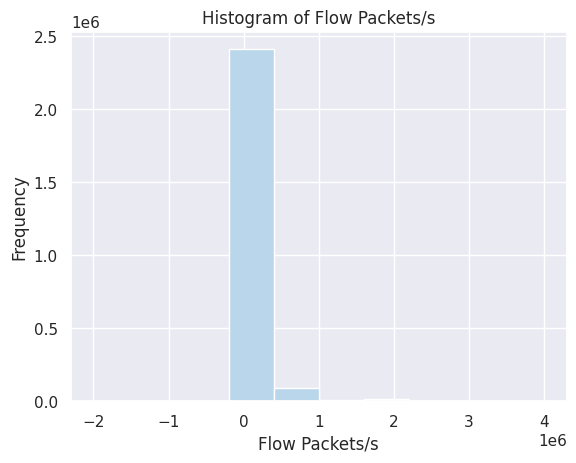

In [ ]:
plt.hist(data['Flow Packets/s'], color = colors[1])
plt.title('Histogram of Flow Packets/s')
plt.xlabel('Flow Packets/s')
plt.ylabel('Frequency')
plt.show()

In [ ]:
med_flow_bytes = data['Flow Bytes/s'].median()
med_flow_packets = data['Flow Packets/s'].median()

print('Median of Flow Bytes/s: ', med_flow_bytes)
print('Median of Flow Packets/s: ', med_flow_packets)

Median of Flow Bytes/s:  4586.600756
Median of Flow Packets/s:  109.4759992228


In [ ]:
# Filling missing values with median
data['Flow Bytes/s'].fillna(med_flow_bytes, inplace = True)
data['Flow Packets/s'].fillna(med_flow_packets, inplace = True)

<ipython-input-11-c500efc82597>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Flow Bytes/s'].fillna(med_flow_bytes, inplace = True)
<ipython-input-11-c500efc82597>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [ ]:
print('Number of \'Flow Bytes/s\' missing values:', data['Flow Bytes/s'].isna().sum())
print('Number of \'Flow Packets/s\' missing values:', data['Flow Packets/s'].isna().sum())

Number of 'Flow Bytes/s' missing values: 0
Number of 'Flow Packets/s' missing values: 0


- The first step is to identify duplicate rows and missing or invalid values. We
identified and dropped the duplicate rows (308381 rows). From the data description, we identified that the dataset has infinity values. So, we checked and replaced the positive or negative infinity values with NaN (not a number) and counted it as a missing value. In the dataset, two features, FlowBytes/s, and Flow Packets/s contain missing values. For both columns, the number of missing values is 1564 which is 0.06% of total values.

- Flow Bytes/s and Flow Packets/s are continuous variables. We can see from the Flow Bytes/s and Flow Packets/s histogram and box plot that the majority of values are towards one area which indicates that the data is not normally distributed. The box plot of the Flow Bytes/s and Flow Packets/s shows that the variables have extreme values or outliers. So, our strategy is to fill in missing values with median value. Because, filling the missing values with the median does not introduce any new categories or disrupt the distribution of the data.

### 2.3 Analysing Patterns using Visualisations

#### Visualization of column correlation. Also, plotting Heat Map

In [ ]:
data['Label'].unique()

array(['BENIGN', 'FTP-Patator', 'SSH-Patator', 'DoS slowloris',
       'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye', 'Heartbleed',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'Infiltration', 'Bot', 'PortScan',
       'DDoS'], dtype=object)

In [ ]:
# Types of attacks & normal instances (BENIGN)
data['Label'].value_counts()

,count
Label,
BENIGN,2096484
DoS Hulk,172849
DDoS,128016
PortScan,90819
DoS GoldenEye,10286
FTP-Patator,5933
DoS slowloris,5385
DoS Slowhttptest,5228
SSH-Patator,3219


In [ ]:
# Creating a dictionary that maps each label to its attack type
attack_map = {
    'BENIGN': 'BENIGN',
    'DDoS': 'DDoS',
    'DoS Hulk': 'DoS',
    'DoS GoldenEye': 'DoS',
    'DoS slowloris': 'DoS',
    'DoS Slowhttptest': 'DoS',
    'PortScan': 'Port Scan',
    'FTP-Patator': 'Brute Force',
    'SSH-Patator': 'Brute Force',
    'Bot': 'Bot',
    'Web Attack � Brute Force': 'Web Attack',
    'Web Attack � XSS': 'Web Attack',
    'Web Attack � Sql Injection': 'Web Attack',
    'Infiltration': 'Infiltration',
    'Heartbleed': 'Heartbleed'
}

# Creating a new column 'Attack Type' in the DataFrame based on the attack_map dictionary
data['Attack Type'] = data['Label'].map(attack_map)

In [ ]:
levels = data['Attack Type'].unique()
levels

array(['BENIGN', 'Brute Force', 'DoS', 'Heartbleed', 'Web Attack',
       'Infiltration', 'Bot', 'Port Scan', 'DDoS'], dtype=object)

In [ ]:
data['Attack Type'].value_counts()

,count
Attack Type,
BENIGN,2273097
DoS,252661
Port Scan,158930
DDoS,128027
Brute Force,13835
Web Attack,2180
Bot,1966
Infiltration,36
Heartbleed,11


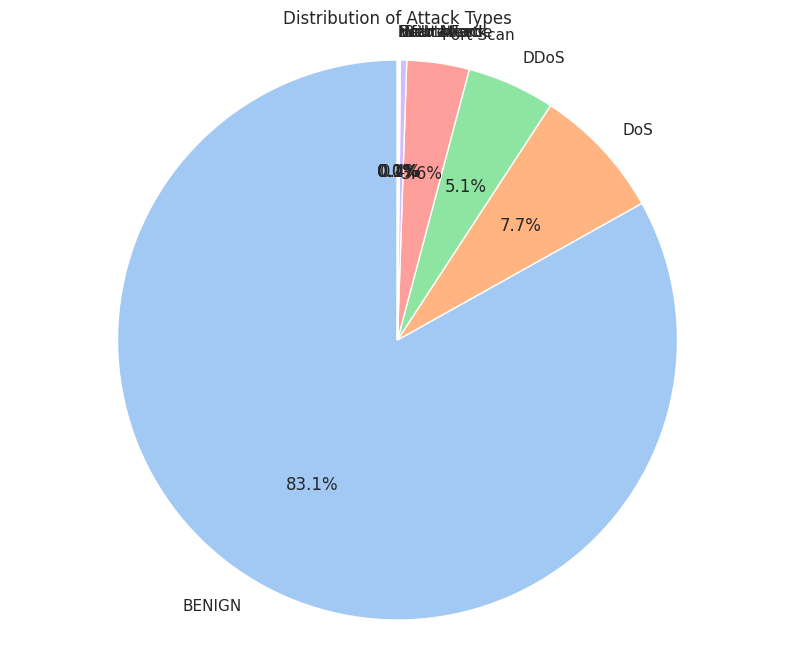

In [ ]:
import matplotlib.pyplot as plt

# Count occurrences of each attack type
attack_counts = data['Attack Type'].value_counts()

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(attack_counts, labels=attack_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Attack Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [ ]:
data.drop('Label', axis = 1, inplace = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Attack Number'] = le.fit_transform(data['Attack Type'])

print(data['Attack Number'].unique())

[0 2 4 5 8 6 1 7 3]


In [ ]:
# Printing corresponding attack type for each encoded value
encoded_values = data['Attack Number'].unique()
for val in sorted(encoded_values):
    print(f"{val}: {le.inverse_transform([val])[0]}")

0: BENIGN
1: Bot
2: Brute Force
3: DDoS
4: DoS
5: Heartbleed
6: Infiltration
7: Port Scan
8: Web Attack


In [ ]:
corr = data.corr(numeric_only = True).round(2)
corr.style.background_gradient(cmap = 'coolwarm', axis = None).format(precision = 2)

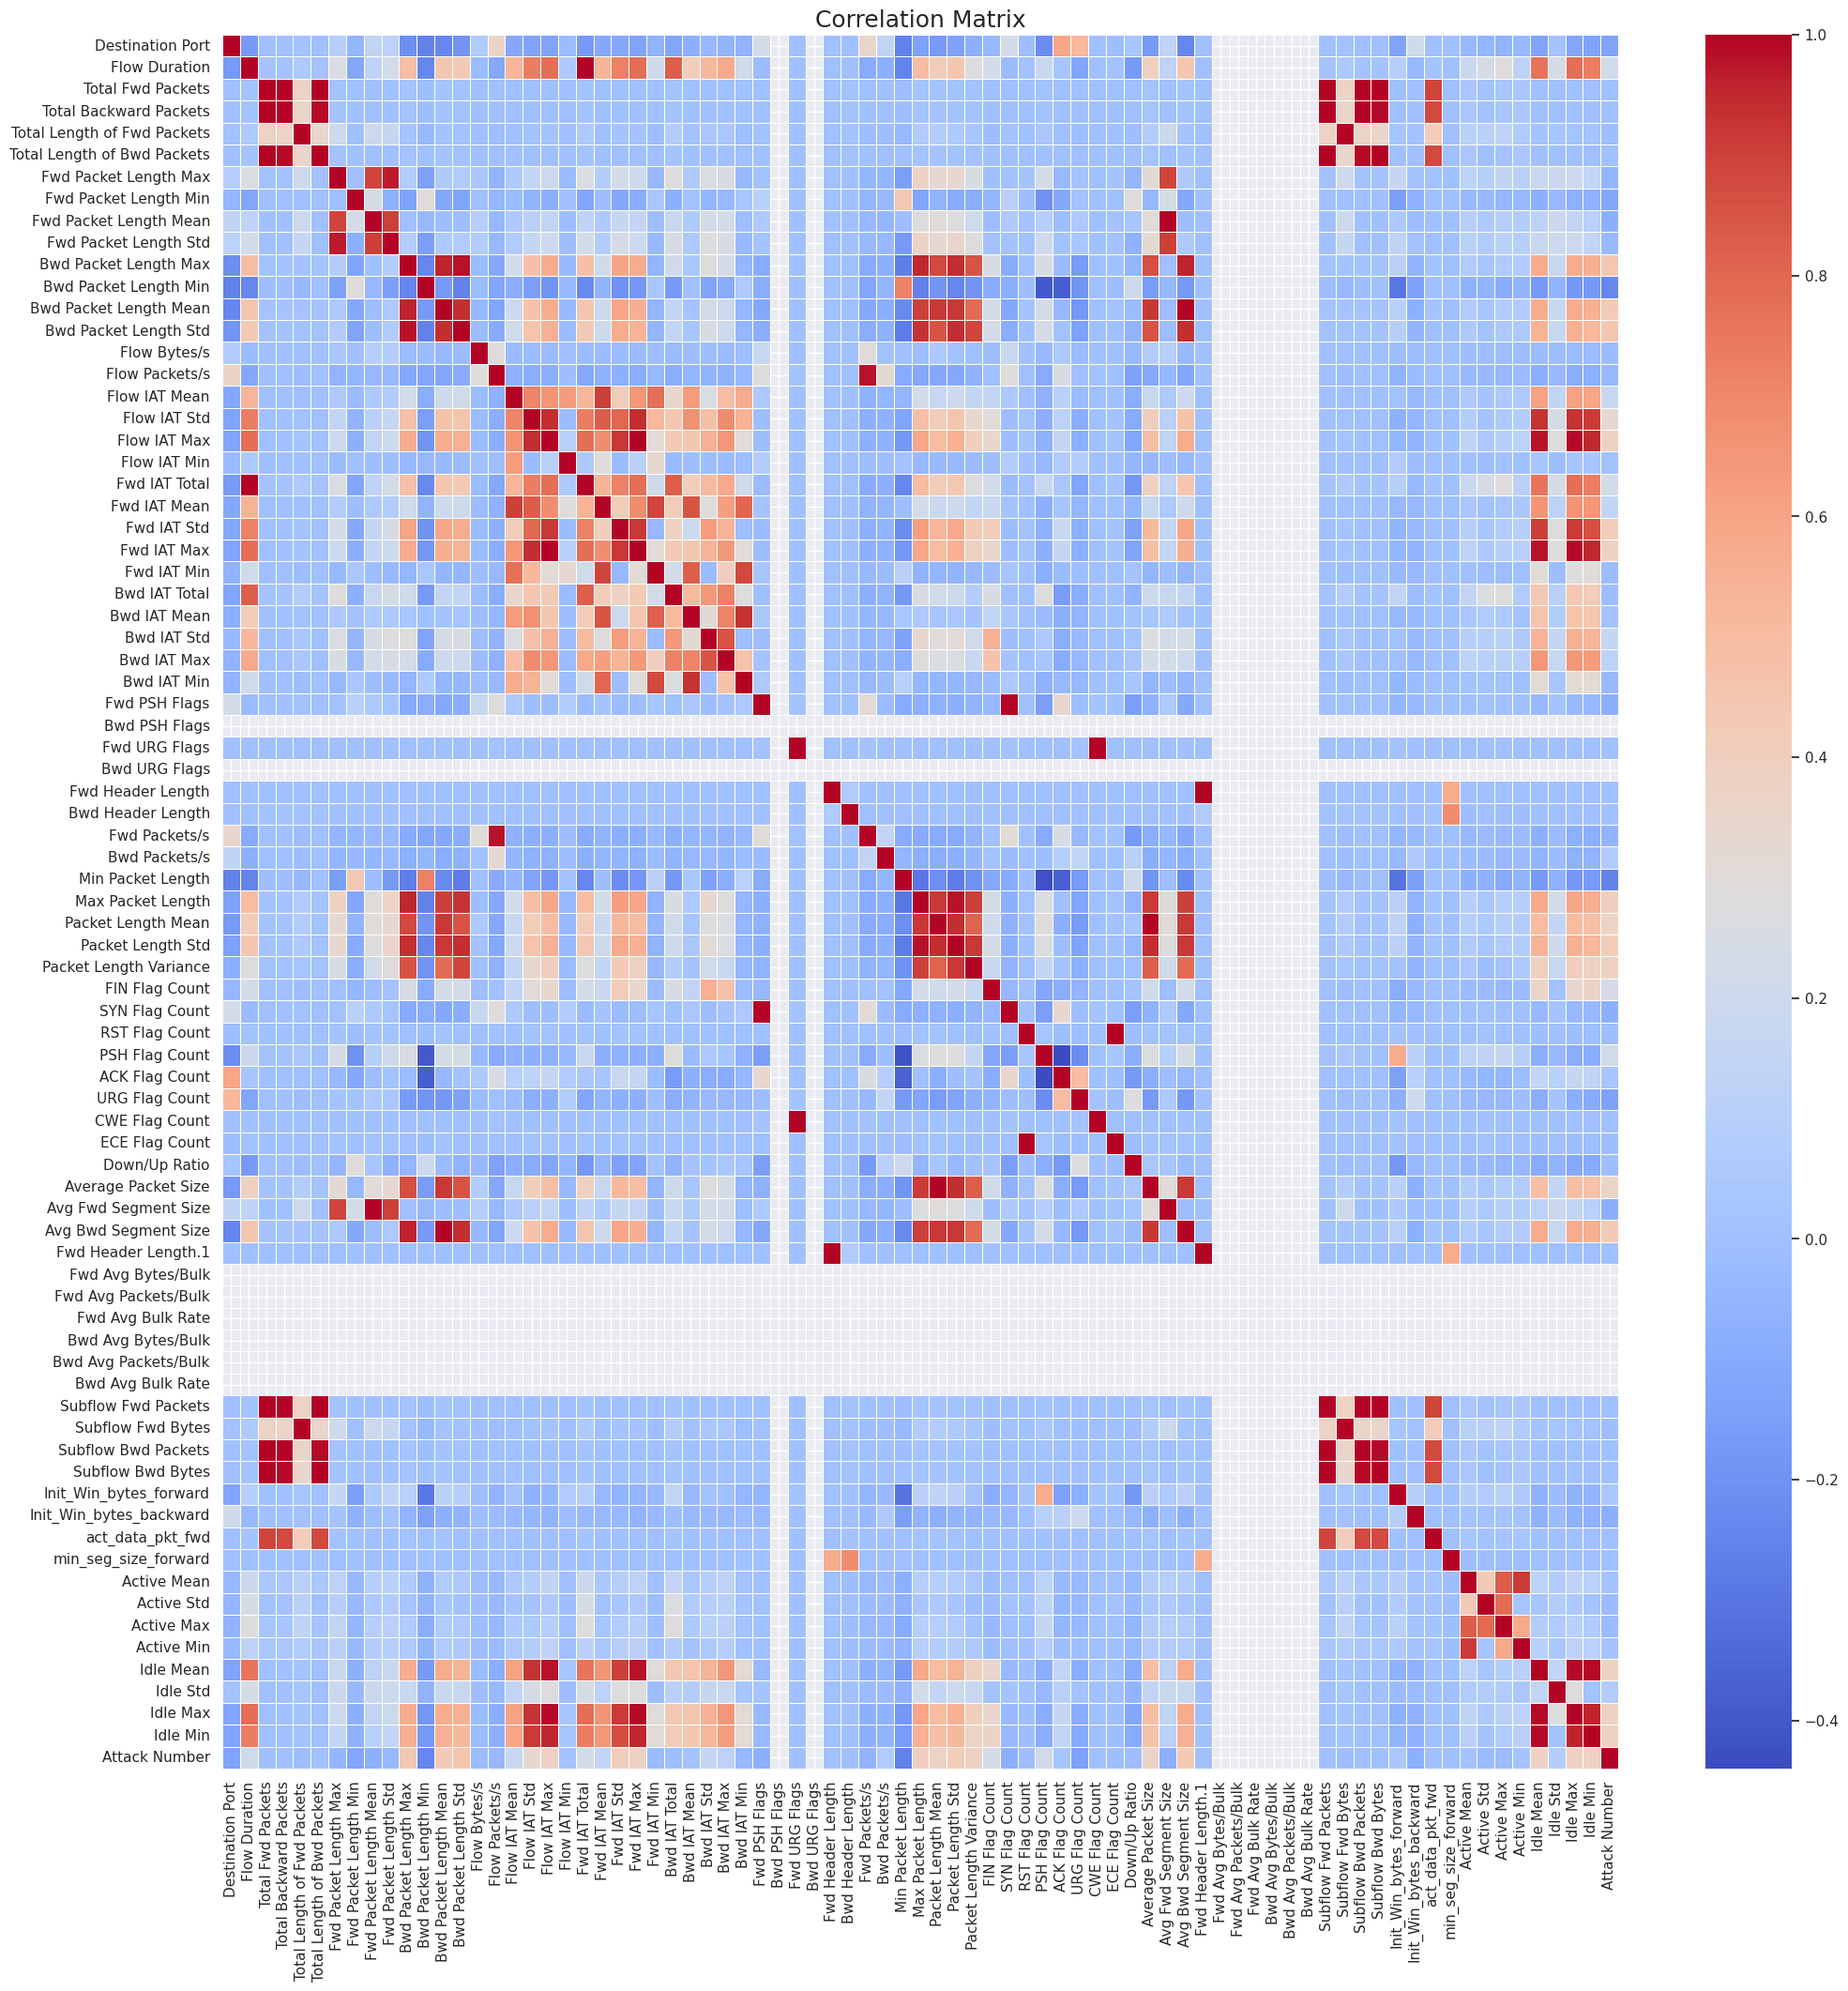

In [ ]:
fig, ax = plt.subplots(figsize = (24, 24))
sns.heatmap(corr, cmap = 'coolwarm', annot = False, linewidth = 0.5)
plt.title('Correlation Matrix', fontsize = 18)
plt.show()

In [ ]:
# Positive correlation features for 'Attack Number'
pos_corr_features = corr['Attack Number'][(corr['Attack Number'] > 0) & (corr['Attack Number'] < 1)].index.tolist()

print("Features with positive correlation with 'Attack Number':\n")
for i, feature in enumerate(pos_corr_features, start = 1):
    corr_value = corr.loc[feature, 'Attack Number']
    print('{:<3} {:<24} :{}'.format(f'{i}.', feature, corr_value))

Features with positive correlation with 'Attack Number':

1.  Flow Duration            :0.21
2.  Bwd Packet Length Max    :0.44
3.  Bwd Packet Length Mean   :0.43
4.  Bwd Packet Length Std    :0.45
5.  Flow IAT Mean            :0.17
6.  Flow IAT Std             :0.33
7.  Flow IAT Max             :0.38
8.  Flow IAT Min             :0.01
9.  Fwd IAT Total            :0.22
10. Fwd IAT Mean             :0.15
11. Fwd IAT Std              :0.41
12. Fwd IAT Max              :0.38
13. Bwd IAT Mean             :0.01
14. Bwd IAT Std              :0.16
15. Bwd IAT Max              :0.12
16. Bwd Packets/s            :0.07
17. Max Packet Length        :0.4
18. Packet Length Mean       :0.37
19. Packet Length Std        :0.41
20. Packet Length Variance   :0.38
21. FIN Flag Count           :0.23
22. PSH Flag Count           :0.21
23. ACK Flag Count           :0.03
24. Average Packet Size      :0.36
25. Avg Bwd Segment Size     :0.43
26. Init_Win_bytes_forward   :0.04
27. Active Mean              :0.0

In [ ]:
print(f'Number of considerable important features: {len(pos_corr_features)}')

Number of considerable important features: 32


In [ ]:
# Checking for columns with zero standard deviation (the blank squares in the heatmap)
std = data.std(numeric_only = True)
zero_std_cols = std[std == 0].index.tolist()
zero_std_cols

['Bwd PSH Flags',
 'Bwd URG Flags',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate']

- We mapped each label to the corresponding attack type. This groups similar attacks together and provides an easier and more interpretable way to analyze the dataset and identify patterns in the different types of attacks.

- For plotting the correlation matrix, we encoded the 'Attack Type' column and plotted the heatmap. From the heatmap, we observe that there are many pairs of highly correlated features. Highly correlated features in the dataset are problematic and lead to overfitting. A positive correlation exists when one variable decreases as the other variable decreases or one variable increases while the other increases. There are 32 features with positive correlations that may help in predicting the target feature.

- The columns with zero standard deviation have the same value in all rows. These columns don't have any variance. It simply means that there is no meaningful relationship with any other columns which results in NaN correlation cofficient. These columns cannot help differentiate between the classes or groups of data. So, these zero standard deviation columns don't contribute to the correlation matrix and will appear blank in the heatmap. This can be helpful while doing data processing as we may drop the columns if we find out that these columns has no variation.

#### Visualization of Linear Relationships of columns (Continuous Numerical Variables)

In [ ]:
# Data sampling for data analysis
sample_size = int(0.2 * len(data)) # 20% of the original size
sampled_data = data.sample(n = sample_size, replace = False, random_state = 0)
sampled_data.shape

(566148, 80)

In [ ]:
# To assess if a sample is representative of the population and comparison of descriptive statistics (mean)
numeric_cols = data.select_dtypes(include = [np.number]).columns.tolist()
print('Descriptive Statistics Comparison (mean):\n')
print('{:<32s}{:<22s}{:<22s}{}'.format('Feature', 'Original Dataset', 'Sampled Dataset', 'Variation Percentage'))
print('-' * 96)

high_variations = []
for col in numeric_cols:
    old = data[col].describe()[1]
    new = sampled_data[col].describe()[1]
    if old == 0:
        pct = 0
    else:
        pct = abs((new - old) / old)
    if pct * 100 > 5:
        high_variations.append((col, pct * 100))
    print('{:<32s}{:<22.6f}{:<22.6f}{:<2.2%}'.format(col, old, new, pct))

In [ ]:
labels = [t[0] for t in high_variations]
values = [t[1] for t in high_variations]

colors = sns.color_palette('Blues', n_colors=len(labels))
fig, ax = plt.subplots(figsize = (10, 5))
ax.bar(labels, values, color = colors)

for i in range(len(labels)):
    ax.text(i, values[i], str(round(values[i], 2)), ha = 'center', va = 'bottom', fontsize = 10)

plt.xticks(rotation = 90)
ax.set_title('Variation percenatge of the features of the sample which\n mean value variates higher than 5% of the actual mean')
ax.set_ylabel('Percentage (%)')
ax.set_yticks(np.arange(0, 41, 5))
plt.show()

In [ ]:
# Printing the unique value count
indent = '{:<3} {:<30}: {}'
print('Unique value count for: ')
for i, feature in enumerate(list(sampled_data.columns)[:-1], start = 1):
    print(indent.format(f'{i}.', feature, sampled_data[feature].nunique()))

In [ ]:
'''Generating a set of visualizations for columns that have more than one unique value but less than 50 unique values.
For categorical columns, a bar plot is generated showing the count of each unique value.
For numerical columns, a histogram is generated.'''
unique_values = sampled_data.nunique()
selected_cols = sampled_data[[col for col in sampled_data if 1 < unique_values[col] < 50]]
rows, cols = selected_cols.shape
col_names = list(selected_cols)
num_of_rows = (cols + 3) // 4

color_palette = sns.color_palette('Blues', n_colors = 3)
plt.figure(figsize = (6 * 4, 8 * num_of_rows))

for i in range(cols):
    plt.subplot(num_of_rows, 4, i + 1)
    col_data = selected_cols.iloc[:, i]
    if col_data.dtype.name == 'object':
        col_data.value_counts().plot(kind = 'bar', color = color_palette[2])
    else:
        col_data.hist(color = color_palette[0])

    plt.ylabel('Count')
    plt.xticks(rotation = 90)
    plt.title(col_names[i])

plt.tight_layout()
plt.show()

In [ ]:
# Correlation matrix for sampled data
corr_matrix = sampled_data.corr(numeric_only = True).round(2)
corr_matrix.style.background_gradient(cmap = 'coolwarm', axis = None).format(precision = 2)

In [ ]:
# Plotting the pairs of strongly positive correlated features in the sampled_data that have a correlation coefficient of 0.85 or higher
cols = list(sampled_data.columns)[:-2]
high_corr_pairs = []
corr_th = 0.85

for i in range(len(cols)):
  for j in range(i + 1, len(cols)):
    val = sampled_data[cols[i]].corr(sampled_data[cols[j]])
    # If the correlation coefficient is NaN or below the threshold, skip to the next pair
    if np.isnan(val) or val < corr_th:
      continue
    high_corr_pairs.append((val, cols[i], cols[j]))

size, cols = len(high_corr_pairs), 4
rows, rem =  size // cols, size % cols
if rem:
  rows += 1

fig, axs = plt.subplots(rows, cols, figsize = (24, int(size * 1.7)))
for i in range(rows):
    for j in range(cols):
      try:
        val, x, y = high_corr_pairs[i * cols + j]
        if val > 0.99:
          axs[i, j].scatter(sampled_data[x], sampled_data[y], color = 'green', alpha = 0.1)
        else:
          axs[i, j].scatter(sampled_data[x], sampled_data[y], color = 'blue', alpha = 0.1)
        axs[i, j].set_xlabel(x)
        axs[i, j].set_ylabel(y)
        axs[i, j].set_title(f'{x} vs\n{y} ({val:.2f})')
      except IndexError:
        fig.delaxes(axs[i, j])

fig.tight_layout()
plt.show()

In [ ]:
sampled_data.drop('Attack Number', axis = 1, inplace = True)
data.drop('Attack Number', axis = 1, inplace = True)

In [ ]:
# Identifying outliers
numeric_data = sampled_data.select_dtypes(include = ['float', 'int'])
q1 = numeric_data.quantile(0.25)
q3 = numeric_data.quantile(0.75)
iqr = q3 - q1
outlier = (numeric_data < (q1 - 1.5 * iqr)) | (numeric_data > (q3 + 1.5 * iqr))
outlier_count = outlier.sum()
outlier_percentage = round(outlier.mean() * 100, 2)
outlier_stats = pd.concat([outlier_count, outlier_percentage], axis = 1)
outlier_stats.columns = ['Outlier Count', 'Outlier Percentage']

print(outlier_stats)

In [ ]:
# Identifying outliers based on attack type
outlier_counts = {}
for i in numeric_data:
    for attack_type in sampled_data['Attack Type'].unique():
        attack_data = sampled_data[i][sampled_data['Attack Type'] == attack_type]
        q1, q3 = np.percentile(attack_data, [25, 75])
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        num_outliers = ((attack_data < lower_bound) | (attack_data > upper_bound)).sum()
        outlier_percent = num_outliers / len(attack_data) * 100
        outlier_counts[(i, attack_type)] = (num_outliers, outlier_percent)

for i in numeric_data:
  print(f'Feature: {i}')
  for attack_type in sampled_data['Attack Type'].unique():
    num_outliers, outlier_percent = outlier_counts[(i, attack_type)]
    print(f'- {attack_type}: {num_outliers} ({outlier_percent:.2f}%)')
  print()

In [ ]:
# Plotting the percentage of outliers that are higher than 20%
fig, ax = plt.subplots(figsize = (24, 10))
for i in numeric_data:
    for attack_type in sampled_data['Attack Type'].unique():
        num_outliers, outlier_percent = outlier_counts[(i, attack_type)]
        if outlier_percent > 20:
            ax.bar(f'{i} - {attack_type}', outlier_percent)

ax.set_xlabel('Feature-Attack Type')
ax.set_ylabel('Percentage of Outliers')
ax.set_title('Outlier Analysis')
ax.set_yticks(np.arange(0, 41, 10))
plt.xticks(rotation = 90)
plt.show()

- As we have a large dataset, it was both time-consuming and computationally expensive to do all the analysis on the original-sized dataset. Therefore, we sampled 20% of the dataset to do our computationally expensive analysis. We also assessed whether the sample is representative of the population by doing a comparison of descriptive statistics (mean) and features that variates 5%
higher than the actual mean values of the dataset.

- A histogram for numerical columns and a bar plot for categorical columns are generated that have more than one unique value and less than 50 unique values. The plots visualize the distribution of data in a quick and easier way. This visualizes patterns like the distribution of values in numerical columns and common categories in categorical columns. It is used to understand the relationships between different variables and identify anomalies in the data.

- The scatter plots show the relationship between strongly positive correlated features with a correlation coefficient of 0.85 or higher. Blue scatter plot points show the correlation coefficient pairs less than 0.99 and green scatter plot points show the pairs with 0.99 or almost 1.0. From these plots, we can visualize linear relationships between the features or identify indications of multicollinearity between features where two or more predictors are highly correlated. Highly correlated features introduce multicollinearity which causes problems for machine learning algorithms because it assumes that the features are independent. From some of the plots, we can see that there is a tight cluster of data points around
the straight line where the correlation coefficient is close to 1.

- We identified the outliers of each feature based on attack types and found that this dataset contains many outliers. Outliers increase variability in the dataset. But in the dataset, outliers may indicate different patterns like network intrusion attempts.

#### Visualization of column relationships (Categorical Variables)

All the features in our dataset is numerical. We have one Categorical Variable.

In [ ]:
# Different 'Attack Type' in the main dataset excluding 'BENIGN'
attacks = data.loc[data['Attack Type'] != 'BENIGN']

plt.figure(figsize = (10, 6))
ax = sns.countplot(x = 'Attack Type', data = attacks, palette = 'pastel', order = attacks['Attack Type'].value_counts().index)
plt.title('Types of attacks')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation = 90)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height() + 1000), ha = 'center')

plt.show()

In [ ]:
attack_counts = attacks['Attack Type'].value_counts()
threshold = 0.005
percentages = attack_counts / attack_counts.sum()
small_slices = percentages[percentages < threshold].index.tolist()
attack_counts['Other'] = attack_counts[small_slices].sum()
attack_counts.drop(small_slices, inplace = True)

sns.set_palette('pastel')
plt.figure(figsize = (8, 8))
plt.pie(attack_counts.values, labels = attack_counts.index, autopct = '%1.1f%%', textprops={'fontsize': 6})
plt.title('Distribution of Attack Types')
plt.legend(attack_counts.index, loc = 'best')
plt.show()

In [ ]:
# Creating a boxplot for each attack type with the columns of sampled dataset
for attack_type in sampled_data['Attack Type'].unique():
    attack_data = sampled_data[sampled_data['Attack Type'] == attack_type]
    plt.figure(figsize=(20, 20))
    sns.boxplot(data = attack_data.drop(columns = ['Attack Type']), orient = 'h')
    plt.title(f'Boxplot of Features for Attack Type: {attack_type}')
    plt.xlabel('Feature Value')
    plt.show()

In [ ]:
data.groupby('Attack Type').first()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Attack Type,,,,,,,,,,,,,,,,,,,,,
BENIGN,49188,4,2,0,12,0,6,6,6.000000,0.000000,...,1,20,0.0,0.00000,0,0,0.0,0.00000,0,0
Bot,8080,60202640,9,9,322,256,322,0,35.777778,107.333333,...,1,32,63678.2,22252.53596,103175,50911,10200000.0,34941.27201,10200000,10100000
Brute Force,80,5216127,3,1,0,0,0,0,0.000000,0.000000,...,0,32,0.0,0.00000,0,0,0.0,0.00000,0,0
DDoS,80,1293792,3,7,26,11607,20,0,8.666667,10.263203,...,2,20,0.0,0.00000,0,0,0.0,0.00000,0,0
DoS,80,5169956,8,6,1101,4222,410,0,137.625000,185.758628,...,7,20,0.0,0.00000,0,0,0.0,0.00000,0,0
Heartbleed,444,119302728,2685,1729,8299,7556917,517,0,3.090875,16.858421,...,118,32,2217.0,0.00000,2217,2217,5024984.0,0.00000,5024984,5024984
Infiltration,444,42664070,5,6,141,291,93,0,28.200000,38.861292,...,4,20,0.0,0.00000,0,0,0.0,0.00000,0,0
Port Scan,80,5021059,6,5,703,1414,356,0,117.166667,181.536131,...,2,32,0.0,0.00000,0,0,0.0,0.00000,0,0
Web Attack,80,5185118,7,7,1022,2321,372,0,146.000000,184.078788,...,3,32,0.0,0.00000,0,0,0.0,0.00000,0,0


## 3. Data Preprocessing

### 3.1 Preprocessing

In [ ]:
# For improving performance and reduce memory-related errors
old_memory_usage = data.memory_usage().sum() / 1024 ** 2
print(f'Initial memory usage: {old_memory_usage:.2f} MB')
for col in data.columns:
    col_type = data[col].dtype
    if col_type != object:
        c_min = data[col].min()
        c_max = data[col].max()
        # Downcasting float64 to float32
        if str(col_type).find('float') >= 0 and c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
            data[col] = data[col].astype(np.float32)

        # Downcasting int64 to int32
        elif str(col_type).find('int') >= 0 and c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
            data[col] = data[col].astype(np.int32)

new_memory_usage = data.memory_usage().sum() / 1024 ** 2
print(f"Final memory usage: {new_memory_usage:.2f} MB")

Initial memory usage: 1727.75 MB
Final memory usage: 907.07 MB


In [ ]:
# Calculating percentage reduction in memory usage
print(f'Reduced memory usage: {1 - (new_memory_usage / old_memory_usage):.2%}')

In [ ]:
data.info()

In [ ]:
data.describe().transpose()

In [ ]:
# Dropping columns with only one unique value
num_unique = data.nunique()
one_variable = num_unique[num_unique == 1]
not_one_variable = num_unique[num_unique > 1].index

dropped_cols = one_variable.index
data = data[not_one_variable]

print('Dropped columns:')
dropped_cols

Dropped columns:


Index(['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Avg Bytes/Bulk',
       'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk',
       'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'],
      dtype='object')

In [ ]:
data.shape

In [ ]:
# Columns after removing non variant columns
data.columns

- To improve performance and reduce the risk of memory-related errors (mostly session crashes), we downcasted the float and integer values based on the presence of the minimum and maximum values and reduced memory usage by 47.5%.

- The columns with zero standard deviation have the same value in all rows.
These columns don't have any variance. It simply means that there is no meaningful relationship with any other columns. These columns cannot help differentiate between the classes or groups of data. So, we dropped the columns that have no variation.

### 3.2 Feature Transformation

#### 3.2.1 Pearson correlation with the threshold of 0.1

In [ ]:
data['Malicious'] = data['Attack Type'].apply(lambda x: 1 if x != 'BENIGN' else 0)

In [ ]:
del data['Attack Type']

In [ ]:
corr_matrix = data.corr()
corr_with_target = corr_matrix['Malicious'].abs().sort_values(ascending=False)

In [ ]:
threshold = 0.1
selected_features = corr_with_target[corr_with_target > threshold].index.tolist()

# Keep only selected features
data_filtered = data[selected_features]

In [ ]:
data_filtered

,Malicious,Bwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Mean,Avg Bwd Segment Size,Packet Length Std,Max Packet Length,Packet Length Variance,Fwd IAT Std,Packet Length Mean,...,PSH Flag Count,Flow IAT Mean,Bwd IAT Std,Fwd IAT Mean,Destination Port,URG Flag Count,Fwd Packet Length Min,ACK Flag Count,Bwd IAT Max,Idle Std
0,0,0.0,0,0.0,0.0,0.0,6,0.0,0.0,6.0,...,0,4.0,0.0,4.0,49188,1,6,1,0,0.0
1,0,0.0,0,0.0,0.0,0.0,6,0.0,0.0,6.0,...,0,1.0,0.0,1.0,49188,1,6,1,0,0.0
2,0,0.0,0,0.0,0.0,0.0,6,0.0,0.0,6.0,...,0,1.0,0.0,1.0,49188,1,6,1,0,0.0
3,0,0.0,0,0.0,0.0,0.0,6,0.0,0.0,6.0,...,0,1.0,0.0,1.0,49188,1,6,1,0,0.0
4,0,0.0,0,0.0,0.0,0.0,6,0.0,0.0,6.0,...,0,3.0,0.0,3.0,49486,1,6,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,0,0.0,6,6.0,6.0,0.0,6,0.0,0.0,6.0,...,0,61.0,0.0,0.0,61374,1,6,1,0,0.0
225741,0,0.0,6,6.0,6.0,0.0,6,0.0,0.0,6.0,...,0,72.0,0.0,0.0,61378,1,6,1,0,0.0
225742,0,0.0,6,6.0,6.0,0.0,6,0.0,0.0,6.0,...,0,75.0,0.0,0.0,61375,1,6,1,0,0.0
225743,0,0.0,0,0.0,0.0,0.0,6,0.0,0.0,6.0,...,0,48.0,0.0,48.0,61323,0,6,1,0,0.0


In [ ]:
del data

#### 3.2.2.A. ML-Based Feature Selection (Random Forest)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Specify the path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/CICIDS2017/data_filtered.csv'

# Read the CSV file into a pandas DataFrame
data_filtered = pd.read_csv(file_path)

# Now you can work with the imported DataFrame 'data_filtered'
print(data_filtered.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Malicious  Bwd Packet Length Std  Bwd Packet Length Max  \
0          0               0.000000                      0   
1          0               0.000000                      0   
2          0               0.000000                      0   
3          0               0.000000                      0   
4          0             119.511505                    207   

   Bwd Packet Length Mean  Avg Bwd Segment Size  Packet Length Std  \
0                     0.0                   0.0            0.00000   
1                     0.0                   0.0            0.00000   
2                     0.0                   0.0            0.00000   
3                     0.0                   0.0            0.00000   
4                   103.5                 103.5          107.52744   

   Max Packet Length  Packet Length Variance  Average Packet Size  \
0       

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = data_filtered.drop(columns=['Malicious'])  # Features
y = data_filtered['Malicious']  # Target variable

# Train a Random Forest model to get feature importance
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select top 12 features
ml_selected_features = feature_importance_df.head(12)['Feature'].tolist()

# Create new dataset
data_ml_selected = data_filtered[['Malicious'] + ml_selected_features]


In [ ]:
data_ml_selected.columns

In [ ]:
# Save the DataFrame to a CSV file in your Google Drive
data_ml_selected.to_csv('/content/drive/MyDrive/CICIDS2017/data_ml_selected.csv', index=False)


#### 3.2.2.B PCA-Based Feature Selection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Specify the path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/CICIDS2017/data_filtered.csv'

# Read the CSV file into a pandas DataFrame
data_filtered = pd.read_csv(file_path)

# Now you can work with the imported DataFrame 'data_filtered'
print(data_filtered.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Malicious  Bwd Packet Length Std  Bwd Packet Length Max  \
0          0               0.000000                      0   
1          0               0.000000                      0   
2          0               0.000000                      0   
3          0               0.000000                      0   
4          0             119.511505                    207   

   Bwd Packet Length Mean  Avg Bwd Segment Size  Packet Length Std  \
0                     0.0                   0.0            0.00000   
1                     0.0                   0.0            0.00000   
2                     0.0                   0.0            0.00000   
3                     0.0                   0.0            0.00000   
4                   103.5                 103.5          107.52744   

   Max Packet Length  Packet Length Variance  Average Packet Size  \
0       

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

X = data_filtered.drop(columns=['Malicious'])  # Features
y = data_filtered['Malicious']  # Target variable

# Fit PCA to get feature importance
pca = PCA(n_components=12)
pca.fit(X)

# Get absolute sum of PCA components to determine feature importance
pca_importance = np.abs(pca.components_).sum(axis=0)
pca_feature_importance = pd.DataFrame({'Feature': X.columns, 'PCA Importance': pca_importance})
pca_feature_importance = pca_feature_importance.sort_values(by='PCA Importance', ascending=False)

# Select top 12 features from PCA
pca_selected_features = pca_feature_importance.head(12)['Feature'].tolist()

# Create new dataset
data_pca_selected = data_filtered[['Malicious'] + pca_selected_features]


In [ ]:
data_pca_selected.to_csv('/content/drive/MyDrive/CICIDS2017/data_pca_selected.csv', index=False)

## 4.	Machine Learning Models

### 4.1 Each of the model descriptions is written in their designated sections.

####  4.1.A Run this if you have choosen the A. ML-Based Feature Selection (Random Forest)

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

# Specify the path to your saved dataset in Google Drive
file_path = '/content/drive/MyDrive/CICIDS2017/data_ml_selected.csv'

# Read the saved dataset
data_ml_selected = pd.read_csv(file_path)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### 4.1.B Run this if you have choosen the PCA way

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

# Specify the path to your saved dataset in Google Drive
file_path = '/content/drive/MyDrive/CICIDS2017/data_pca_selected.csv'

# Read the saved dataset
data_ml_selected = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
data_ml_selected.columns

Index(['Malicious', 'Fwd IAT Std', 'Bwd IAT Std', 'Flow IAT Std',
       'Fwd IAT Max', 'Flow IAT Mean', 'Flow IAT Max', 'Fwd IAT Mean',
       'Fwd IAT Total', 'Flow Duration', 'Bwd IAT Max', 'Idle Max',
       'Idle Mean'],
      dtype='object')

#### 4.2 Train-test split


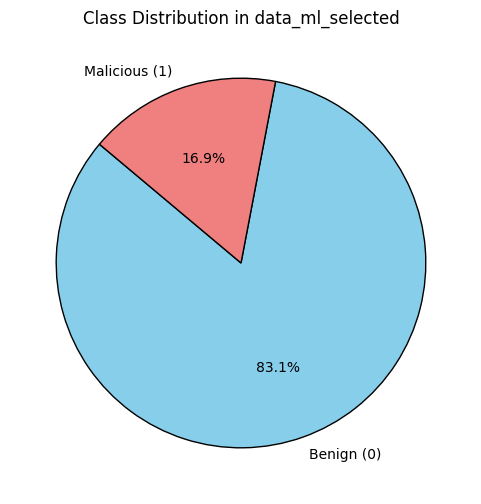

In [ ]:
import matplotlib.pyplot as plt

# Count occurrences of each class
class_counts = data_ml_selected['Malicious'].value_counts()

# Define labels
labels = ['Benign (0)', 'Malicious (1)']
colors = ['skyblue', 'lightcoral']

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Class Distribution in data_ml_selected')
plt.show()


In [ ]:
# For cross validation
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.model_selection import train_test_split

# Separate classes
malicious_bc = data_ml_selected[data_ml_selected['Malicious'] == 1]
benign_bc = data_ml_selected[data_ml_selected['Malicious'] == 0]

# Compute required benign samples to maintain a 60:40 ratio
required_benign_bc = int(len(malicious_bc) * (60 / 40))

# Sample benign cases
benign_sample_bc = benign_bc.sample(n=required_benign_bc, random_state=42)

# Merge selected benign and all malicious samples
balanced_data_bc = pd.concat([benign_sample_bc, malicious_bc])

# Splitting the data into features (X_bc) and target (y_bc)
X_bc = balanced_data_bc.drop('Malicious', axis=1)
y_bc = balanced_data_bc['Malicious']

# Train-test split (keeping same test_size = 0.25 for consistency)
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.25, stratify=y_bc, random_state=0)

print(f"Train Size: {X_train_bc.shape}, Test Size: {X_test_bc.shape}")


Train Size: (798521, 12), Test Size: (266174, 12)


In [ ]:
train_counts = y_train_bc.value_counts()
test_counts = y_test_bc.value_counts()

print("Training data class counts:")
print(train_counts)

print("\nTesting data class counts:")
test_counts


Training data class counts:
Malicious
0    479113
1    319408
Name: count, dtype: int64

Testing data class counts:


,count
Malicious,
0,159704
1,106470


### 4.2 Logistic Regression (Binary Classification)

**Description:**  
Logistic regression is a type of statistical model used to predict the probability of a binary outcome based on one or more independent variables. It models the relationship between the independent and dependent variable using a sigmoid function to output a probability score between 0 and 1.

**Parameters:**  
- **max_iter:** Sets the maximum number of iterations for the solver to converge (set to 10,000 to ensure convergence).  
- **C:** Inverse regularization strength; a smaller value specifies stronger regularization.  
- **solver:** Uses the 'saga' optimizer which works efficiently on large datasets.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Initialize and train Logistic Regression
lr = LogisticRegression(max_iter=2000, C=0.1, random_state=0, solver='saga')
lr.fit(X_train_bc, y_train_bc)

# Cross-validation
cv_lr = cross_val_score(lr, X_train_bc, y_train_bc, cv=3)
print('Logistic Regression Model:')
print(f'Cross-validation scores: {cv_lr}')
print(f'Mean CV score: {cv_lr.mean():.2f}')

Logistic Regression Model:
Cross-validation scores: [0.77089798 0.76975963 0.77051391]
Mean CV score: 0.77


### 4.3 Naive Bayes Classifier

The Naive Bayes Classifier is a family of probabilistic algorithms based on Bayes’ theorem, with the “naive” assumption that all features are conditionally independent given the class label. This assumption, although rarely true in real-world data, simplifies the computation and allows the algorithm to scale efficiently even with large datasets.

Despite its simplicity, the Naive Bayes Classifier often performs remarkably well, particularly in domains like text classification, spam filtering, and network intrusion detection. Its speed in both training and prediction makes it an attractive choice when computational resources or time are limited. Moreover, its probabilistic nature provides intuitive class probability estimates that can be valuable for decision-making and further analysis.

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the Gaussian Naive Bayes classifier
nb = GaussianNB()

# Train the model on the training data
nb.fit(X_train_bc, y_train_bc)

# Perform cross-validation with 2 folds on the training set
cv_nb = cross_val_score(nb, X_train_bc, y_train_bc, cv=2)
print('\nGaussianNB Model:')
print(f'Cross-validation scores: {cv_nb}')
print(f'Mean CV score: {cv_nb.mean():.2f}')


GaussianNB Model:
Cross-validation scores: [0.73147139 0.73141061]
Mean CV score: 0.73


### 4.4 LightGBM

LightGBM is a gradient boosting framework that uses tree-based learning algorithms. Its unique leaf-wise growth strategy allows it to reduce loss more efficiently than traditional level-wise methods. This efficiency in training and memory usage makes LightGBM highly scalable and well-suited for handling the high-dimensional data of network traffic. Its rapid training capabilities and competitive accuracy make it a strong candidate for intrusion detection tasks.

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the LightGBM classifier with a fixed random state for reproducibility
lgbm = LGBMClassifier(random_state=0)

# Fit the model on the training data
lgbm.fit(X_train_bc, y_train_bc)

# Perform cross-validation with 2 folds on the training set
cv_lgbm = cross_val_score(lgbm, X_train_bc, y_train_bc, cv=2)
print('\nLightGBM Model:')
print(f'Cross-validation scores: {cv_lgbm}')
print(f'Mean CV score: {cv_lgbm.mean():.2f}')


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 319408, number of negative: 479113
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.127395 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3056
[LightGBM] [Info] Number of data points in the train set: 798521, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.399999 -> initscore=-0.405467
[LightGBM] [Info] Start training from score -0.405467
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 159704, number of negative: 239556
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.075495 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3057
[LightGBM]

### 4.5 XGBoost Classifier

XGBoost (Extreme Gradient Boosting) builds an ensemble of trees sequentially, where each new tree corrects the errors of the previous ones. This model is known for its speed and performance in structured data tasks.

Parameters:

n_estimators: Number of trees (set to 100 as a starting point).

learning_rate: Step size for weight updates (0.1 is a common choice).

max_depth: Maximum depth of each tree (set to 6 for a balance between bias and variance).

use_label_encoder: Disabled to avoid warnings.
eval_metric: Set to 'logloss' as the evaluation metric.

In [ ]:
import xgboost as xgb

# Initialize and train XGBoost Classifier
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6,
                              random_state=0, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_bc, y_train_bc)

# Cross-validation
cv_xgb = cross_val_score(xgb_model, X_train_bc, y_train_bc, cv=3)
print('\nXGBoost Model:')
print(f'Cross-validation scores: {cv_xgb}')
print(f'Mean CV score: {cv_xgb.mean():.2f}')


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:30:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:30:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:30:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:30:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Model:
Cross-validation scores: [0.93446392 0.93497111 0.93246873]
Mean CV score: 0.93


## 5.	Performance Evaluation and Discussion

We now evaluate each model on the test set. We will generate predictions and compute the classification report, confusion matrix, and accuracy for each model.

### 5.1 Model testing

In [ ]:
# Importing necessary functions
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report, \
 roc_auc_score, roc_curve, auc, precision_recall_curve

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
# Logistic Regression Performance
print("\nLogistic Regression Performance on Test Set:")
y_pred_lr = lr.predict(X_test_bc)
print(classification_report(y_test_bc, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test_bc, y_pred_lr))
print("Accuracy:", accuracy_score(y_test_bc, y_pred_lr))


Logistic Regression Performance on Test Set:
              precision    recall  f1-score   support

           0       0.75      0.93      0.83    159704
           1       0.84      0.53      0.65    106470

    accuracy                           0.77    266174
   macro avg       0.79      0.73      0.74    266174
weighted avg       0.78      0.77      0.76    266174

Confusion Matrix:
 [[148857  10847]
 [ 50284  56186]]
Accuracy: 0.7703344428832267


In [ ]:
# Evaluate the model on the test set
y_pred_nb = nb.predict(X_test_bc)
print("\nGaussianNB Performance on Test Set:")
print(classification_report(y_test_bc, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test_bc, y_pred_nb))
print("Accuracy:", accuracy_score(y_test_bc, y_pred_nb))


GaussianNB Performance on Test Set:
              precision    recall  f1-score   support

           0       0.71      0.95      0.81    159704
           1       0.84      0.40      0.55    106470

    accuracy                           0.73    266174
   macro avg       0.77      0.68      0.68    266174
weighted avg       0.76      0.73      0.70    266174

Confusion Matrix:
 [[151557   8147]
 [ 63369  43101]]
Accuracy: 0.7313186111340702


In [ ]:
# Evaluate the model on the test set
y_pred_lgbm = lgbm.predict(X_test_bc)
print("\nLightGBM Performance on Test Set:")
print(classification_report(y_test_bc, y_pred_lgbm))
print("Confusion Matrix:\n", confusion_matrix(y_test_bc, y_pred_lgbm))
print("Accuracy:", accuracy_score(y_test_bc, y_pred_lgbm))


LightGBM Performance on Test Set:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94    159704
           1       0.88      0.96      0.92    106470

    accuracy                           0.94    266174
   macro avg       0.93      0.94      0.93    266174
weighted avg       0.94      0.94      0.94    266174

Confusion Matrix:
 [[146316  13388]
 [  3877 102593]]
Accuracy: 0.9351364145258365


In [ ]:
# XGBoost Performance
print("\nXGBoost Performance on Test Set:")
y_pred_xgb = xgb_model.predict(X_test_bc)
print(classification_report(y_test_bc, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test_bc, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test_bc, y_pred_xgb))


XGBoost Performance on Test Set:
              precision    recall  f1-score   support

           0       0.98      0.91      0.94    159704
           1       0.88      0.97      0.92    106470

    accuracy                           0.93    266174
   macro avg       0.93      0.94      0.93    266174
weighted avg       0.94      0.93      0.94    266174

Confusion Matrix:
 [[146013  13691]
 [  3680 102790]]
Accuracy: 0.9347381787853059


### 5.2 Comparison of all (need to be run at once after running all)

#### 5.2.A Visualisation (for A)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                             recall_score, f1_score, roc_curve, auc)

# Define the models' predictions and their corresponding model objects
models_predictions = {
    'Logistic Regression': y_pred_lr,
    'Naive Bayes': y_pred_nb,
    'LightGBM': y_pred_lgbm,
    'XGBoost': y_pred_xgb
}

# Define the model objects for ROC curves
model_objects = {
    'Logistic Regression': lr,
    'Naive Bayes': nb,
    'LightGBM': lgbm,
    'XGBoost': xgb_model
}

# Compute performance metrics for each model
metrics_dict = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

for model_name, y_pred in models_predictions.items():
    metrics_dict['Model'].append(model_name)
    metrics_dict['Accuracy'].append(accuracy_score(y_test_bc, y_pred))
    metrics_dict['Precision'].append(precision_score(y_test_bc, y_pred, zero_division=0))
    metrics_dict['Recall'].append(recall_score(y_test_bc, y_pred, zero_division=0))
    metrics_dict['F1 Score'].append(f1_score(y_test_bc, y_pred, zero_division=0))

metrics_df = pd.DataFrame(metrics_dict)

# --- Bar Chart for Performance Metrics ---
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.barplot(x='Model', y='Accuracy', data=metrics_df, ax=axes[0,0])
axes[0,0].set_title('Accuracy Comparison')
sns.barplot(x='Model', y='Precision', data=metrics_df, ax=axes[0,1])
axes[0,1].set_title('Precision Comparison')
sns.barplot(x='Model', y='Recall', data=metrics_df, ax=axes[1,0])
axes[1,0].set_title('Recall Comparison')
sns.barplot(x='Model', y='F1 Score', data=metrics_df, ax=axes[1,1])
axes[1,1].set_title('F1 Score Comparison')
plt.tight_layout()
plt.show()

# --- Confusion Matrices ---
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for ax, (model_name, y_pred) in zip(axes.flatten(), models_predictions.items()):
    cm = confusion_matrix(y_test_bc, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', ax=ax)
    ax.set_title(f'{model_name} Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
plt.tight_layout()
plt.show()

# --- ROC Curves ---
fig, ax = plt.subplots(figsize=(8, 6))
for model_name, model in model_objects.items():
    # Use predict_proba if available; otherwise, fallback to decision_function
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_bc)[:, 1]
    else:
        y_proba = model.decision_function(X_test_bc)
    fpr, tpr, _ = roc_curve(y_test_bc, y_proba)
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

ax.plot([0, 1], [0, 1], 'k--', label='Random Chance')
ax.set_title('ROC Curve Comparison')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend(loc='lower right')
plt.show()


#### 5.2.B Visualisation (for B)   Done




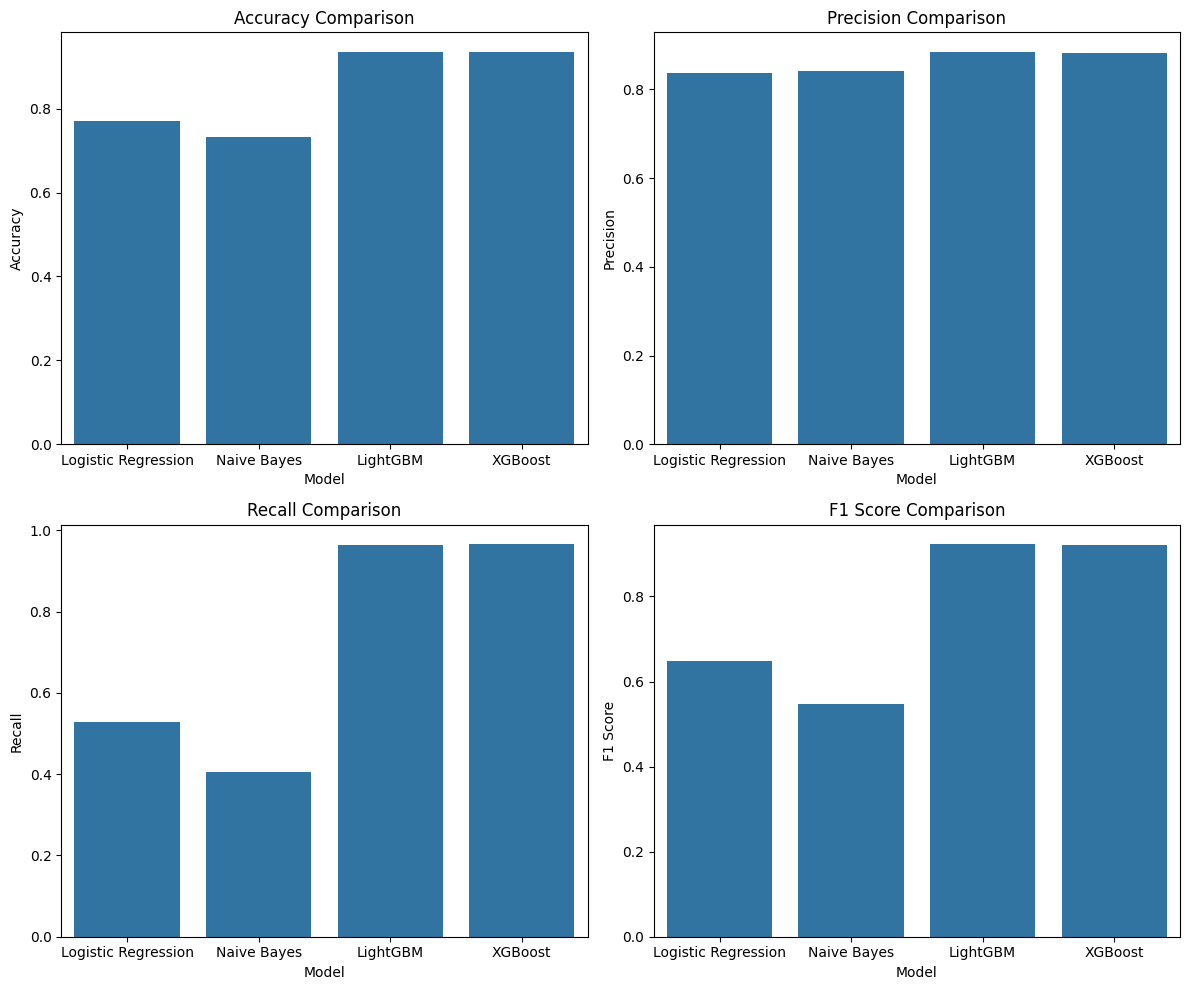

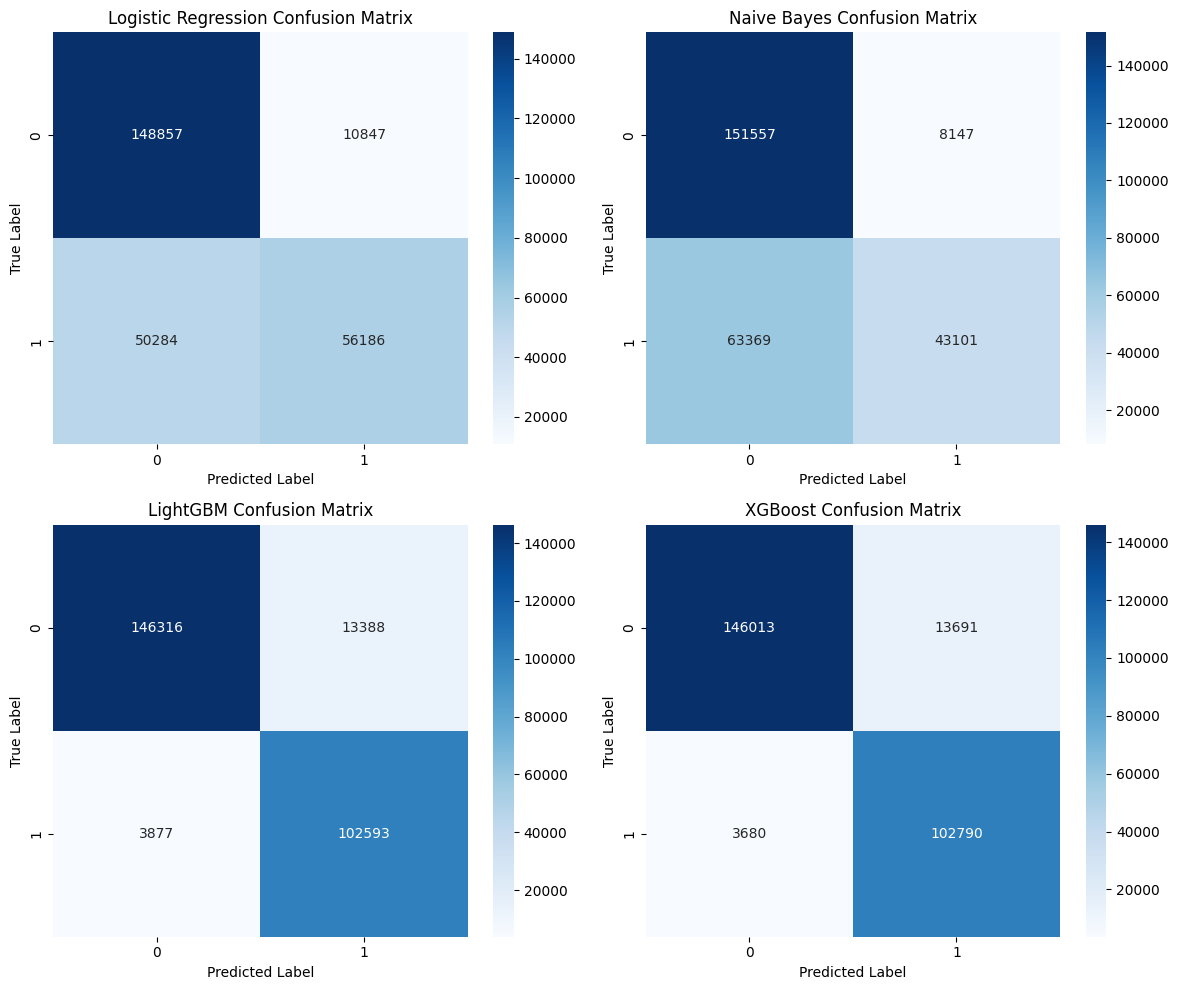

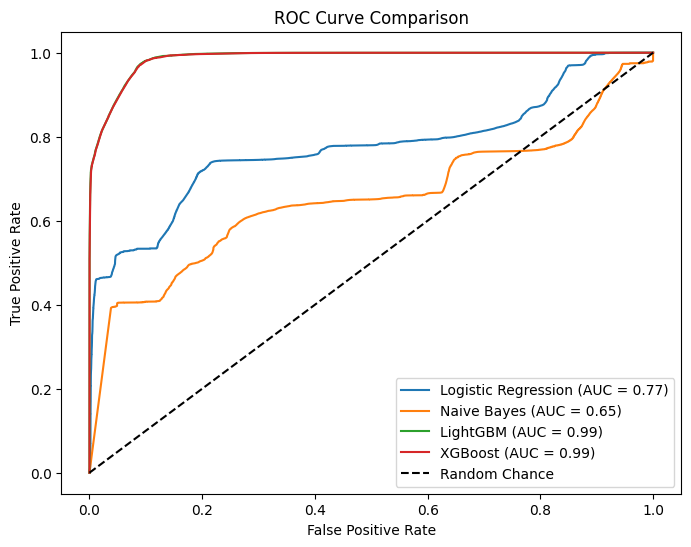

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                             recall_score, f1_score, roc_curve, auc)

# Define the models' predictions and their corresponding model objects
models_predictions = {
    'Logistic Regression': y_pred_lr,
    'Naive Bayes': y_pred_nb,
    'LightGBM': y_pred_lgbm,
    'XGBoost': y_pred_xgb
}

# Define the model objects for ROC curves
model_objects = {
    'Logistic Regression': lr,
    'Naive Bayes': nb,
    'LightGBM': lgbm,
    'XGBoost': xgb_model
}

# Compute performance metrics for each model
metrics_dict = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

for model_name, y_pred in models_predictions.items():
    metrics_dict['Model'].append(model_name)
    metrics_dict['Accuracy'].append(accuracy_score(y_test_bc, y_pred))
    metrics_dict['Precision'].append(precision_score(y_test_bc, y_pred, zero_division=0))
    metrics_dict['Recall'].append(recall_score(y_test_bc, y_pred, zero_division=0))
    metrics_dict['F1 Score'].append(f1_score(y_test_bc, y_pred, zero_division=0))

metrics_df = pd.DataFrame(metrics_dict)

# --- Bar Chart for Performance Metrics ---
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.barplot(x='Model', y='Accuracy', data=metrics_df, ax=axes[0,0])
axes[0,0].set_title('Accuracy Comparison')
sns.barplot(x='Model', y='Precision', data=metrics_df, ax=axes[0,1])
axes[0,1].set_title('Precision Comparison')
sns.barplot(x='Model', y='Recall', data=metrics_df, ax=axes[1,0])
axes[1,0].set_title('Recall Comparison')
sns.barplot(x='Model', y='F1 Score', data=metrics_df, ax=axes[1,1])
axes[1,1].set_title('F1 Score Comparison')
plt.tight_layout()
plt.show()

# --- Confusion Matrices ---
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for ax, (model_name, y_pred) in zip(axes.flatten(), models_predictions.items()):
    cm = confusion_matrix(y_test_bc, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', ax=ax)
    ax.set_title(f'{model_name} Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
plt.tight_layout()
plt.show()

# --- ROC Curves ---
fig, ax = plt.subplots(figsize=(8, 6))
for model_name, model in model_objects.items():
    # Use predict_proba if available; otherwise, fallback to decision_function
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_bc)[:, 1]
    else:
        y_proba = model.decision_function(X_test_bc)
    fpr, tpr, _ = roc_curve(y_test_bc, y_proba)
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

ax.plot([0, 1], [0, 1], 'k--', label='Random Chance')
ax.set_title('ROC Curve Comparison')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend(loc='lower right')
plt.show()


### 5.3 Detailed Discussion


#### Logistic Regression
---
- **Pros:**
  - *Simplicity:* A straightforward model that is easy to interpret, making it an excellent baseline for binary classification tasks.
  - *Fast Training:* Quick to train even on large datasets, which is beneficial when rapid prototyping is needed.
- **Cons:**
  - *Linearity Assumption:* Assumes a linear relationship between the features and the target, which might limit its performance on complex, non-linear datasets.
  - *Limited Feature Interaction:* Does not inherently capture interactions between features unless explicitly modeled.

---

#### Naive Bayes Classifier (GaussianNB)
---
- **Pros:**
  - *Extremely Fast:* Training and prediction are computationally inexpensive, making it ideal for very large datasets or real-time applications.
  - *Simplicity:* The model is straightforward to implement and understand, with clear probabilistic interpretations.
  - *Works Well with High-Dimensional Data:* Can perform effectively in high-dimensional spaces, particularly when the independence assumption is approximately met.
- **Cons:**
  - *Strong Independence Assumption:* Assumes that all features are conditionally independent given the class label, which often does not hold in real-world data, potentially reducing accuracy.
  - *Limited Expressiveness:* May struggle with capturing complex relationships or interactions between features, leading to simpler decision boundaries.
  - *Sensitivity to Data Distribution:* Performance can be affected if the underlying distribution of the data deviates significantly from the model’s assumptions.
---

---

#### LightGBM
---
- **Pros:**
  - *High Efficiency:* Leverages a leaf-wise growth strategy and optimized algorithms, leading to fast training even on large, high-dimensional datasets.
  - *Captures Complex Patterns:* Effectively models non-linear relationships and feature interactions, making it well-suited for complex datasets.
  - *Scalability:* Designed to handle large-scale data with low memory usage and support for parallel processing, which accelerates the learning process.
- **Cons:**
  - *Hyperparameter Sensitivity:* Requires careful tuning of hyperparameters (e.g., number of leaves, learning rate) to achieve optimal performance.
  - *Less Interpretable:* Compared to simpler models like Logistic Regression, it is more complex, making interpretation of the results less straightforward.
  - *Potential Overfitting:* If not properly regularized, the model can overfit, especially when the dataset contains noise or outliers.
---


#### XGBoost
---
- **Pros:**
  - *Superior Predictive Performance:* Often achieves state-of-the-art results in binary classification tasks due to its effective boosting technique.
  - *Handles Feature Interactions Well:* Captures complex interactions between features through sequential tree boosting.
  - *Efficiency in Boosting:* Incrementally corrects errors from previous trees, leading to robust performance.
- **Cons:**
  - *Hyperparameter Tuning:* Requires meticulous tuning of parameters (e.g., learning_rate, max_depth, n_estimators) to avoid overfitting.
  - *Higher Computational Demand:* More resource-intensive than simpler models, which may require longer training times and more memory.
---

### 5.4 Evaluation ✅✔️  (PCA and LightGBM finalised)

**ALL IN ONE** (PCA) ✅✔️

Logistic Regression Model:
Cross-validation scores: [0.77089798 0.76975963 0.77051391]
Mean CV score: 0.77

GaussianNB Model:
Cross-validation scores: [0.73147139 0.73141061]
Mean CV score: 0.73


LightGBM Model:
Cross-validation scores: [0.93543071 0.93421079]
Mean CV score: 0.93


XGBoost Model:
Cross-validation scores: [0.93446392 0.93497111 0.93246873]
Mean CV score: 0.93



Logistic Regression Performance on Test Set:
              precision    recall  f1-score   support

           0       0.75      0.93      0.83    159704
           1       0.84      0.53      0.65    106470

    accuracy                           0.77    266174
   macro avg       0.79      0.73      0.74    266174
weighted avg       0.78      0.77      0.76    266174

Confusion Matrix:
 [[148857  10847]
 [ 50284  56186]]
Accuracy: 0.7703344428832267





GaussianNB Performance on Test Set:
              precision    recall  f1-score   support

           0       0.71      0.95      0.81    159704
           1       0.84      0.40      0.55    106470

    accuracy                           0.73    266174
   macro avg       0.77      0.68      0.68    266174
weighted avg       0.76      0.73      0.70    266174

Confusion Matrix:
 [[151557   8147]
 [ 63369  43101]]
Accuracy: 0.7313186111340702




LightGBM Performance on Test Set:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94    159704
           1       0.88      0.96      0.92    106470

    accuracy                           0.94    266174
   macro avg       0.93      0.94      0.93    266174
weighted avg       0.94      0.94      0.94    266174

Confusion Matrix:
 [[146316  13388]
 [  3877 102593]]
Accuracy: 0.9351364145258365





XGBoost Performance on Test Set:
              precision    recall  f1-score   support

           0       0.98      0.91      0.94    159704
           1       0.88      0.97      0.92    106470

    accuracy                           0.93    266174
   macro avg       0.93      0.94      0.93    266174
weighted avg       0.94      0.93      0.94    266174

Confusion Matrix:
 [[146013  13691]
 [  3680 102790]]
Accuracy: 0.9347381787853059

## 6.Saving the Best Model (Pickling)

In [ ]:
from google.colab import drive
import os
import pickle
import numpy as np
import pandas as pd
import lightgbm
import sklearn

# Mount Google Drive
drive.mount('/content/drive')

# Define the folder path
folder_path = '/content/drive/MyDrive/CICIDS2017/'
os.makedirs(folder_path, exist_ok=True)

# Save model
model_path = os.path.join(folder_path, 'best_model_xgb.pkl')
with open(model_path, "wb") as f:
    pickle.dump(lgbm, f)

print(f"✅ Model saved at: {model_path}")

# Save library versions
libs = {
    "numpy": np.__version__,
    "pandas": pd.__version__,
    "lightgbm": lightgbm.__version__,
    "sklearn": sklearn.__version__
}

# Save versions as a separate pickle file
versions_path = os.path.join(folder_path, 'model_dependencies.pkl')
with open(versions_path, "wb") as f:
    pickle.dump(libs, f)

print(f"✅ Library versions saved at: {versions_path}")
print("📌 Installed versions:", libs)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Model saved at: /content/drive/MyDrive/CICIDS2017/best_model_xgb.pkl
✅ Library versions saved at: /content/drive/MyDrive/CICIDS2017/model_dependencies.pkl
📌 Installed versions: {'numpy': '2.0.2', 'pandas': '2.2.2', 'lightgbm': '4.5.0', 'sklearn': '1.6.1'}
